In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth',100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

!pip install mlxtend

In [2]:
df=pd.read_csv('Assignment_PA.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [3]:
round(df['Class'].value_counts(normalize =True)*100,1)
# Since it's a classification dataset, its having two classes (1 and 2) in the ratio of 2:1
# Our objective is to identify the siginificant columns which is having high correlation with the target.
# To identify that, we need to understand the dataset by performing EDA, removing the insignificant columns.
# It involves few methods like checking the multicollinearity, 

1    65.3
2    34.7
Name: Class, dtype: float64

## Checking for null values.

In [4]:
df.info()
# The basic information about the dataset is shown below,
# This dataset has 34 columns and it has 1941 records and the respective datatype of the columns is shown.
# Since it has 34 columns, we might miss some of the null values.
# So, we will check it manually.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [5]:
dfna=df.isna().sum()/len(df)*100
print('Null values: ',round(dfna[dfna>0].sort_values(ascending=False),2))

Null values:  Series([], dtype: float64)


No columns is having null values.

In [6]:
df.describe().T
# since it has features 33 and 1 target, it's difficult to see the relationship and significance of the features wrt target.
# so we will start with checking the sum of the columns.

,count,mean,std,min,25%,50%,75%,max
V1,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
V2,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
V3,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
V4,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
V5,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
V6,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
V7,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
V8,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
V9,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
V10,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


In [7]:
df.sum().sort_values(ascending=False)
# Checking the sum of values shows which column is having large numbers following by small numbers.

V4       3.204084e+09
V3       3.203979e+09
V8       4.004519e+08
V5       3.676018e+06
V11      2.832230e+06
V2       1.199469e+06
V1       1.108575e+06
V10      2.527060e+05
V6       2.171110e+05
V9       1.641090e+05
V7       1.610370e+05
V14      1.528300e+05
V22      4.837726e+03
V24      2.723750e+03
Class    2.614000e+03
V23      2.592567e+03
V20      1.578950e+03
V19      1.185036e+03
V13      1.164000e+03
V27      1.136301e+03
V21      1.117500e+03
V17      1.107859e+03
V16      8.039687e+02
V12      7.770000e+02
V15      6.438592e+02
V33      4.020000e+02
V30      3.910000e+02
V29      1.900000e+02
V25      1.616613e+02
V28      1.580000e+02
V31      7.200000e+01
V18      6.475390e+01
V32      5.500000e+01
V26     -2.548631e+02
dtype: float64

In [8]:
count=0
for c in df.columns:
    if len(df[c].value_counts(normalize=True))==2:
        print('Column name: ',c)
        print(round(df[c].value_counts(normalize=True)*100,1),'\n')
        count+=1
print("Number of Bivariate columns: ",count)

# From this analysis the feature V31 and V32 having high skewed values.


Column name:  V12
0    60.0
1    40.0
Name: V12, dtype: float64 

Column name:  V13
1    60.0
0    40.0
Name: V13, dtype: float64 

Column name:  V28
0    91.9
1     8.1
Name: V28, dtype: float64 

Column name:  V29
0    90.2
1     9.8
Name: V29, dtype: float64 

Column name:  V30
0    79.9
1    20.1
Name: V30, dtype: float64 

Column name:  V31
0    96.3
1     3.7
Name: V31, dtype: float64 

Column name:  V32
0    97.2
1     2.8
Name: V32, dtype: float64 

Column name:  V33
0    79.3
1    20.7
Name: V33, dtype: float64 

Column name:  Class
1    65.3
2    34.7
Name: Class, dtype: float64 

Number of Bivariate columns:  9


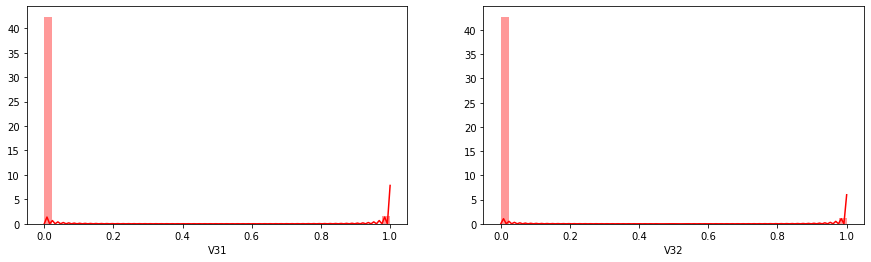

Before drop: 34
After  drop: 32


In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(df['V31'], ax=ax[0],color='r')
sns.distplot(df['V32'], ax=ax[1],color='r')
plt.show()

# The below distplot shows the data skew.
# These features are not significant, hence dropping these features from the dataset.
print('Before drop:',len(df.columns))
df.drop(columns=['V31', 'V32'],inplace=True)
print('After  drop:',len(df.columns))

In [10]:
inp=df.drop(columns='Class')
out=df['Class']

In [11]:
# Feature selection (Backward elimination, forward selection)
# Backward elimination - first it will  consider all the features, then it will look for the column which is having p value > 0.05
# and it will sort in descending order, then it will remove the feature which is having high p value.
# 10-1 removed, remaining 9 columns, 9 col it will find p value, then it will sort, and it will rmove high pvalues.
# it will stop once all the feature are having p values < 0.05

# fwd selection - it will pick the column which is highly correlated with target, check for p values, 
# if its <0.05 it will keep the column else it will pick next highly correlated column with target.
# once picked the first column, then it will add the second column, check for p values, if its <0.05 it will go for third column,
# else it will remove the second col and look for next column, it will repeat the process for all the combinations of columns,
# finally it will end up with the set of columns which is having p value <0.05

In [12]:
lr=LinearRegression()
back=sfs(lr,k_features='best',forward=False)
# 'best' will return the best feature, if you want number of best feature, then need to specify the number
# forward false will enable backward elimination, it will start with all the features,
# then it will remove the feature one by one which is haivng high p value,
# it will stop and return the best features once all the features are having p values less than 0.05
back_fe=back.fit(inp,out)
back_feat=back_fe.k_feature_names_

In [13]:
back_feat

('V1',
 'V2',
 'V5',
 'V7',
 'V11',
 'V15',
 'V17',
 'V18',
 'V19',
 'V22',
 'V23',
 'V24',
 'V25',
 'V27',
 'V28',
 'V29',
 'V30',
 'V33')

In [14]:
inp1=df[['V1','V2','V5','V7','V11','V15','V17','V18','V19','V22','V23','V24','V25','V27','V28','V29','V30','V33']]
inp1.head(2)

,V1,V2,V5,V7,V11,V15,V17,V18,V19,V22,V23,V24,V25,V27,V28,V29,V30,V33
0,42,50,267,44,1687,0.0498,0.1818,0.0047,0.4706,2.4265,0.9031,1.6435,0.8182,0.5822,1,0,0,0
1,645,651,108,30,1687,0.7647,0.2069,0.0036,0.6000,2.0334,0.7782,1.4624,0.7931,0.2984,1,0,0,0


In [15]:
len(back_feat)

18

In [16]:
# It's not possible to visualize all the 18 columns to check the correlation with the target.
# So, we will peform to check the multicollinearity to reduce few more insignificant columns.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif['Features']=inp1.columns
# inp should be in the np.array, so converting the df to np.array by using .values
# and no need to give the cols for the input, it will take internally based upon the output that is i, if i=0
# it will consider 1st col as output, same for other cols
vif.sort_values(ascending=False,by='Vif') #inf - infinity
#remove the col has VIF values > 5

,Vif,Features
1,70422.420908,V2
0,66840.937975,V1
7,970.104192,V18
9,880.555593,V22
10,487.137812,V23
11,405.603653,V24
4,96.710625,V11
13,34.017083,V27
8,23.023778,V19
2,19.225994,V5


In [19]:
inp2=inp1.drop(columns=['V2','V22','V23','V24','V11','V5','V19'])
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif['Features']=inp2.columns
vif.sort_values(ascending=False,by='Vif') 
# these set of columns are not having multicollinearity effect, now its good to go with these features.

,Vif,Features
3,4.512523,V17
6,4.436680,V27
9,2.995300,V30
4,2.903187,V18
0,2.676582,V1
2,2.532373,V15
5,1.641097,V25
10,1.611505,V33
8,1.327671,V29
7,1.291212,V28


In [20]:
len(inp2.columns)

11

In [21]:
bi_cols=[]
non_bi_cols=[]
count=0
for c in inp2.columns:
    if len(inp2[c].value_counts(normalize=True))==2:
        bi_cols.append(c)
        print('Column name: ',c)
        print(round(inp2[c].value_counts(normalize=True)*100,1),'\n')
        count+=1
    else:
        non_bi_cols.append(c)
print("Number of Bivariate columns: ",count)

Column name:  V28
0    91.9
1     8.1
Name: V28, dtype: float64 

Column name:  V29
0    90.2
1     9.8
Name: V29, dtype: float64 

Column name:  V30
0    79.9
1    20.1
Name: V30, dtype: float64 

Column name:  V33
0    79.3
1    20.7
Name: V33, dtype: float64 

Number of Bivariate columns:  4


In [22]:
bi_df=inp2[bi_cols]
nbi_df=inp2[non_bi_cols]
len(nbi_df.columns)

7

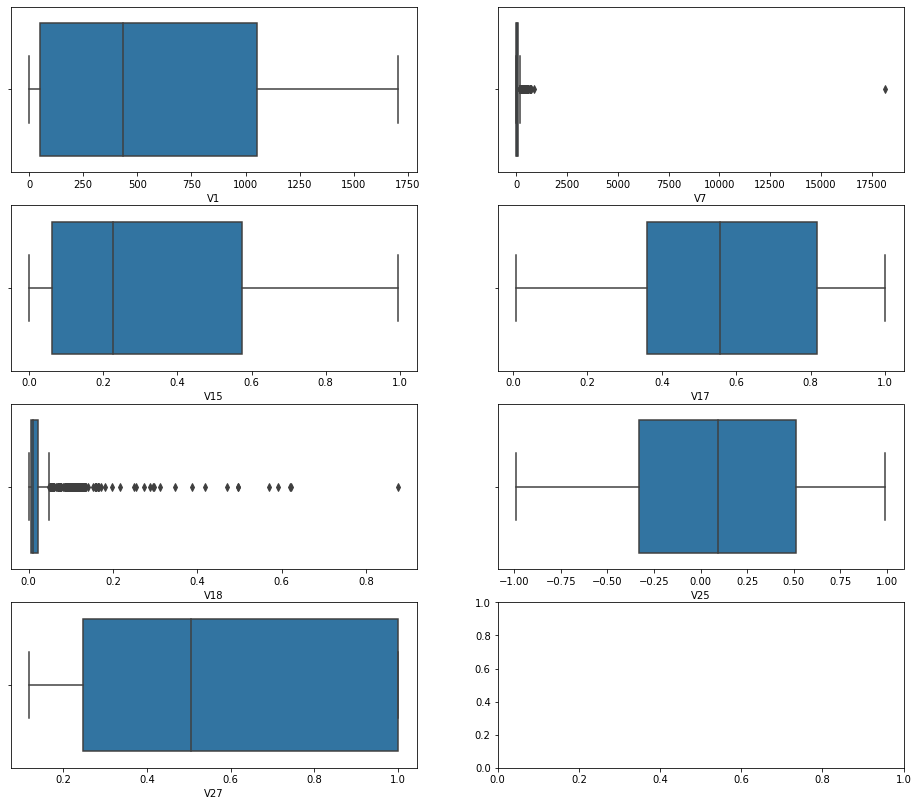

In [23]:
fig, ax = plt.subplots(4, 2, figsize=(16, 14))
sns.boxplot(nbi_df[non_bi_cols[0]],ax=ax[0,0])
sns.boxplot(nbi_df[non_bi_cols[1]], ax=ax[0,1])
sns.boxplot(nbi_df[non_bi_cols[2]],ax=ax[1,0])
sns.boxplot(nbi_df[non_bi_cols[3]], ax=ax[1,1])
sns.boxplot(nbi_df[non_bi_cols[4]],ax=ax[2,0])
sns.boxplot(nbi_df[non_bi_cols[5]], ax=ax[2,1])
sns.boxplot(nbi_df[non_bi_cols[6]],ax=ax[3,0])
plt.show()

# from the below boxplots we can see the outliers in few features,
# that needs to be processed by peforming capping.

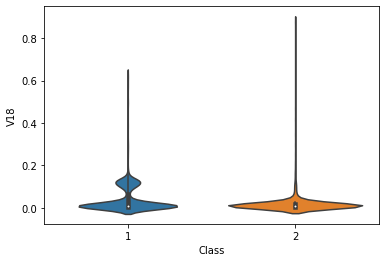

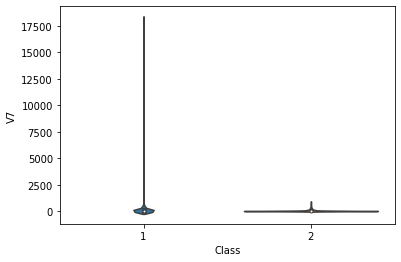

In [24]:
sns.violinplot(x=df['Class'],y=df['V18'])
plt.show()
sns.violinplot(x=df['Class'],y=df['V7'])
plt.show()

In [25]:
# The above violin plot also showing the same outliers wrt each class.

In [26]:
q1=nbi_df['V7'].quantile(0.25)
q3=nbi_df['V7'].quantile(0.75)
iqr=q3-q1
ub=q3 + 1.5*iqr
lb=q1 - 1.5*iqr
for x in nbi_df[nbi_df['V7']>ub]['V7'].values:
    nbi_df['V7']=nbi_df['V7'].replace(x,nbi_df['V7'].quantile(0.9))
for y in nbi_df[nbi_df['V7']<lb]['V7'].values:
    nbi_df['V7']=nbi_df['V7'].replace(x,nbi_df['V7'].quantile(0.1)) 
    
q1=nbi_df['V18'].quantile(0.25)
q3=nbi_df['V18'].quantile(0.75)
iqr=q3-q1
ub=q3 + 1.5*iqr
lb=q1 - 1.5*iqr
for x in nbi_df[nbi_df['V18']>ub]['V18'].values:
    nbi_df['V18']=nbi_df['V18'].replace(x,nbi_df['V18'].quantile(0.9))
for y in nbi_df[nbi_df['V18']<lb]['V18'].values:
    nbi_df['V18']=nbi_df['V18'].replace(y,nbi_df['V18'].quantile(0.1))

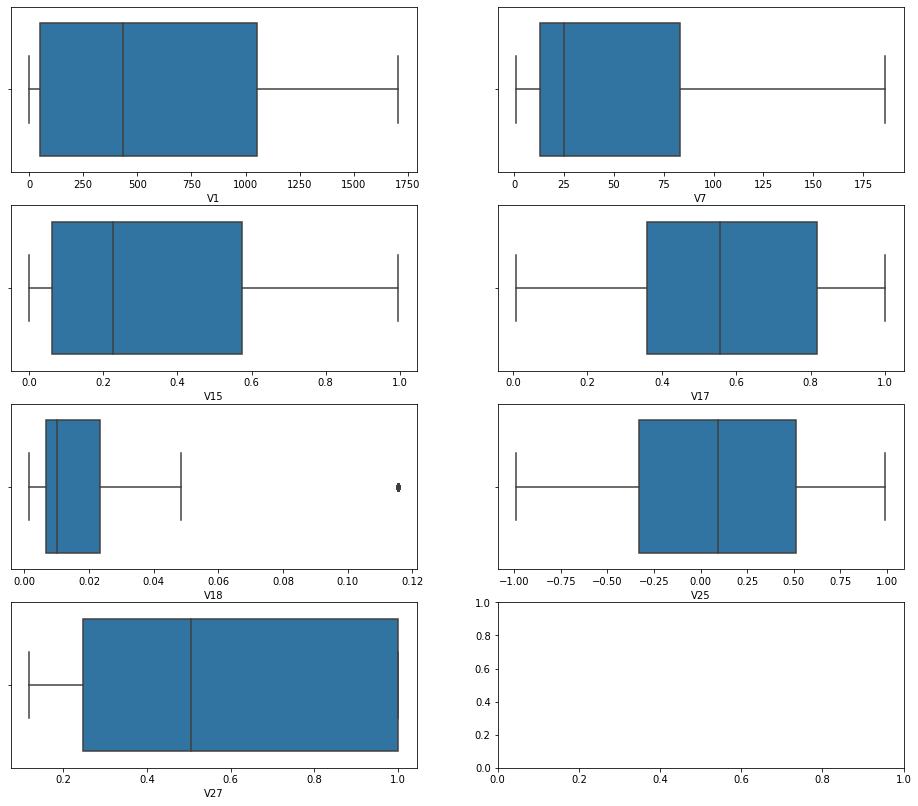

In [27]:
fig, ax = plt.subplots(4, 2, figsize=(16, 14))
sns.boxplot(nbi_df[non_bi_cols[0]],ax=ax[0,0])
sns.boxplot(nbi_df[non_bi_cols[1]], ax=ax[0,1])
sns.boxplot(nbi_df[non_bi_cols[2]],ax=ax[1,0])
sns.boxplot(nbi_df[non_bi_cols[3]], ax=ax[1,1])
sns.boxplot(nbi_df[non_bi_cols[4]],ax=ax[2,0])
sns.boxplot(nbi_df[non_bi_cols[5]], ax=ax[2,1])
sns.boxplot(nbi_df[non_bi_cols[6]],ax=ax[3,0])
plt.show()

# now we have performed capping to handle the outliers, capped with quantile 90 for the values greater than upper bound.
# and capped with quantile 10 for the values lesser than lower bound.

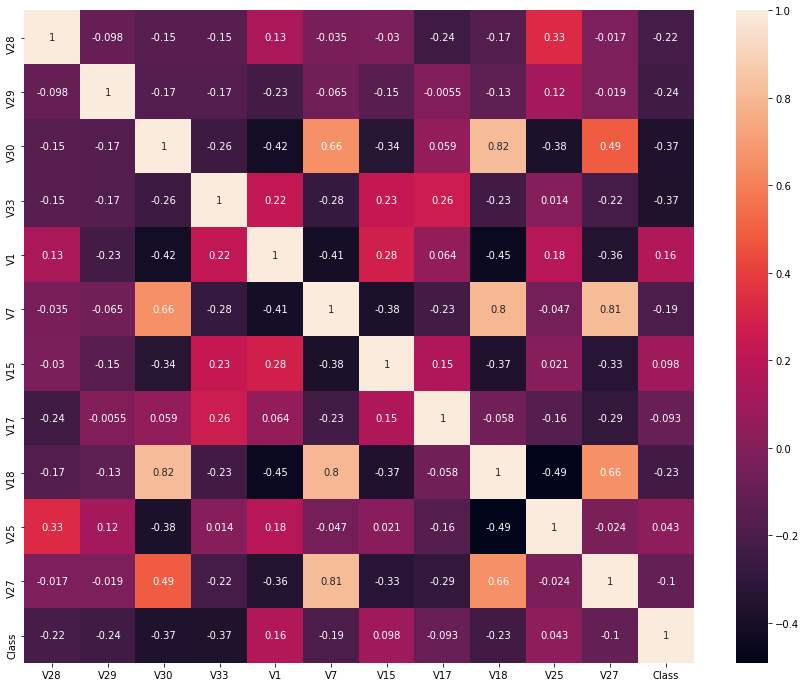

In [28]:
df=pd.concat([bi_df,nbi_df,out] ,axis=1, join='inner')
plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
# From the above heat map we can identify the columns which is having correlation btw them.
# From this we can see the features v18 and v30 having high positive correlation of .63
# the feature v27 and v18 having positive correlation of about .52
# the feature v27 and v30 having positive correlation of about .49
# then the feature v25 and v18 having high negative correlation of about -0.44
# the feature v25 and v30 having negative correlation of about -0.38
# the feature v27 and v1 having negative correlation of about -0.36

#wrt target,
# the feature v33 and v30 having negative correlation of about -0.37
# the feature v33 and v30 having positive correlation of about 0.16
# and the remaining features are not having significant correlation with the target feature.

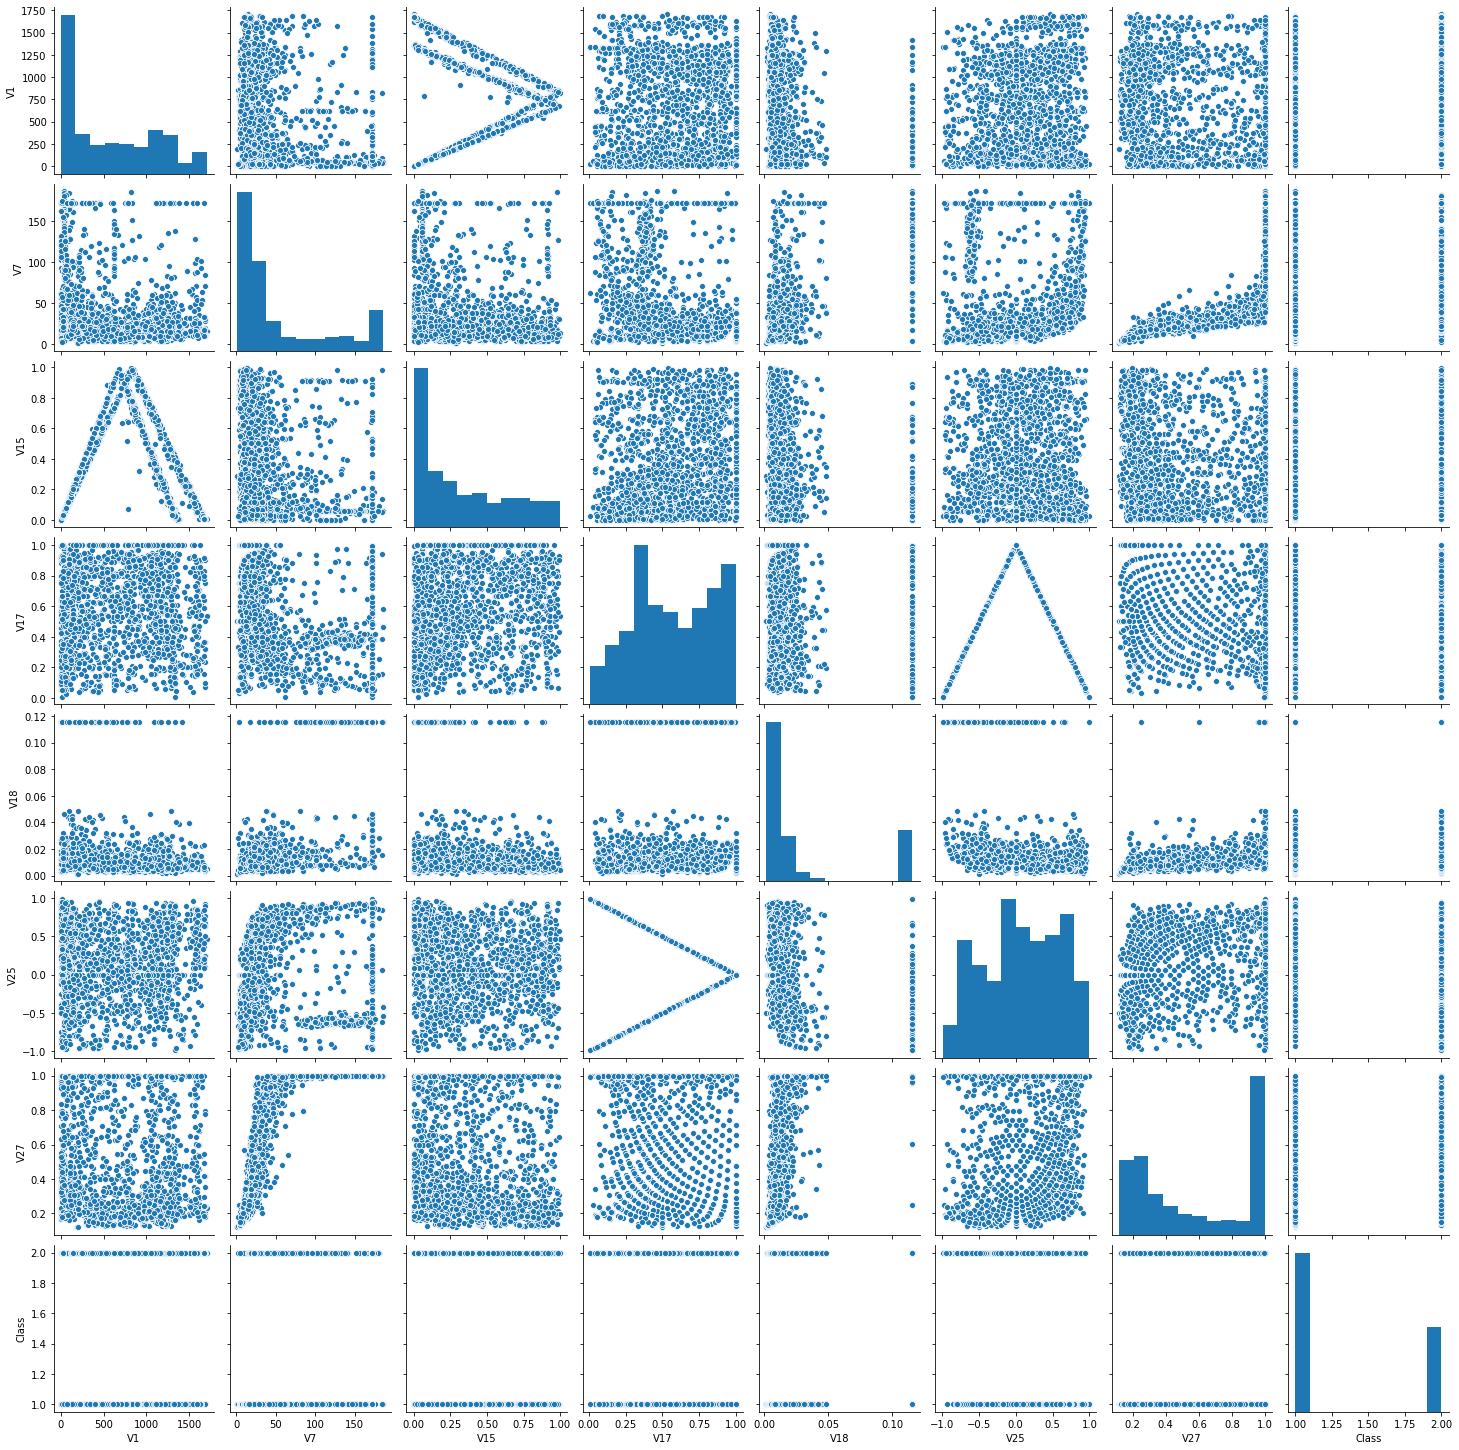

In [30]:
ndf=pd.concat([nbi_df,out] ,axis=1, join='inner')
sns.pairplot(ndf)
plt.show()

In [31]:
# the same correlation is depcited in the form of data distribution across x and y axis for the non bivarient features.
# for eg, you can take the feature v1 and v17, you can see that there is no correlation 
# and the heat map also says that with the correlation value of 0.064
# the individual scatter plot is shown below for detailed view.
# the same applies for rest.


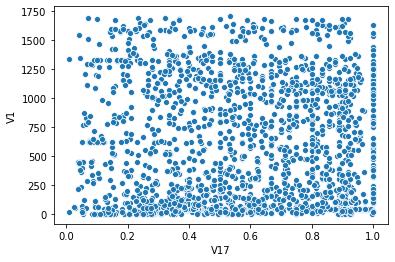

In [32]:
sns.scatterplot(x=ndf['V17'],y=ndf['V1'],palette='green')
plt.show()

### 1. Logit Regression


In [33]:
inp=df.drop(columns='Class')
out=df['Class'].replace(2,0)
xc=sm.add_constant(inp)
logi=sm.Logit(out,xc)
logimodel=logi.fit()
logimodel.summary()

         Current function value: 0.112575
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1941
Model:                          Logit   Df Residuals:                     1929
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.8256
Time:                        23:21:29   Log-Likelihood:                -218.51
converged:                      False   LL-Null:                       -1252.7
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6449      0.677      3.908      0.000       1.318       3.971
V28           28.2595   1.27e+04      0.002      0.998   -2.49e+04    2.49e+04
V29           80.2958   3407.638      0.024      0.981   -6598.552    6759.143
V30           86.0651   8760.260      0.010      0.992   -1.71e+04    1.73e+04
V33           80.4852   5122.740      0.016      0.987   -9959.900    1.01e+04
V1             0.0009      0.000      3.103      0.002       0.000       0.001
V7             0.0225      0.008      2.694      0.007       0.006       0.039
V15            1.8857      0.387      4.871      0.000       1.127       2.644
V17           -3.2559      0.606     -5.374      0.000      -4.443      -2.068
V18         -587.0174     69.937     -8.394      0.000    -724.091    -449.944
V25           -3.4773      0.468     -7.435      0.000      -4.394      -2.561
V27            1.3094      1.272      1.030      0.303      -1.183       3.802
==============================================================================

Possibly complete quasi-separation: A fraction 0.64 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [34]:
pval=logimodel.pvalues
print(pval[pval>0.05])
print(bi_cols)
# this model also says that the bivariant columns which we have separated manually having the same imbalanced issues.
# and moreover V27 feature is also failed with pvalue 0.3
# so we can drop these columns to proceed further.

V28    0.998225
V29    0.981201
V30    0.992161
V33    0.987465
V27    0.303200
dtype: float64
['V28', 'V29', 'V30', 'V33']


In [35]:
x=inp.drop(columns=['V28', 'V29', 'V30', 'V33','V27'])
y=out

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ytrainpred=logreg.predict(xtrain)
ytrainprob=logreg.predict_proba(xtrain)[:,1]
ytrainprob

array([0.78015769, 0.5222554 , 0.54556385, ..., 0.54233637, 0.6928261 ,
       0.6238932 ])

In [37]:
logreg = LogisticRegression(solver='liblinear')

logreg.fit(xtrain, ytrain)

y_train_pred = logreg.predict(xtrain)
y_train_prob = logreg.predict_proba(xtrain)[:,1]

print('Confusion Matrix - Training Model', '\n',  confusion_matrix(ytrain, y_train_pred))
print('Accuracy Score', accuracy_score(ytrain, y_train_pred))

y_test_pred = logreg.predict(xtest)
y_test_prob = logreg.predict_proba(xtest)[:,1]

print('\n')
print('Confusion Matrix - Testing Model', '\n',  confusion_matrix(ytest, y_test_pred))
print('Accuracy Score', accuracy_score(ytest, y_test_pred))

Confusion Matrix - Training Model 
 [[ 29 429]
 [ 34 866]]
Accuracy Score 0.6590574374079529


Confusion Matrix - Testing Model 
 [[ 16 199]
 [ 11 357]]
Accuracy Score 0.6397941680960549


In [38]:
# the final list of significant features are as follows,
x.columns

Index(['V1', 'V7', 'V15', 'V17', 'V18', 'V25'], dtype='object')

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier

### 2.DecisionTreeClassifier

In [40]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(xtrain,ytrain)
ytrainpred=dtree.predict(xtrain)
ytrainprob=dtree.predict_proba(xtrain)
ytestpred=dtree.predict(xtest)
ytestprob=dtree.predict_proba(xtest)
print('confusion matrix: Train','\n',confusion_matrix(ytrain,ytrainpred))
print('accuracy score: Train','\n',accuracy_score(ytrain,ytrainpred))
print('\n')
print('confusion matrix: Test','\n',confusion_matrix(ytest,ytestpred))
print('accuracy score: Test','\n',accuracy_score(ytest,ytestpred))

confusion matrix: Train 
 [[208 250]
 [129 771]]
accuracy score: Train 
 0.7209131075110456


confusion matrix: Test 
 [[ 93 122]
 [ 52 316]]
accuracy score: Test 
 0.7015437392795884


In [41]:
# this dtree model has more accuracy than logi model.

### 3.Random Forest Classifier

In [42]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
y_train_pred = rf.predict(xtrain) 
y_train_prob = rf.predict_proba (xtrain)[:,1]
y_test_pred = rf.predict(xtest) 
y_test_prob = rf.predict_proba(xtest)[:,1]
print('Confusion Matrix of Train:', confusion_matrix(ytrain, y_train_pred)) 
print('Accuracy of Train: ', accuracy_score(ytrain, y_train_pred))
print('Classification Report:',classification_report(y_train_pred,ytrain))
print('\n')
print('Confusion Matrix of Test: ', '\n', confusion_matrix(ytest, y_test_pred))
print('Accuracy of Test: ', accuracy_score(ytest, y_test_pred)) 
print('Classification Report:',classification_report(y_test_pred,ytest))


Confusion Matrix of Train: [[458   0]
 [  0 900]]
Accuracy of Train:  1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1358
   macro avg       1.00      1.00      1.00      1358
weighted avg       1.00      1.00      1.00      1358



Confusion Matrix of Test:  
 [[107 108]
 [ 54 314]]
Accuracy of Test:  0.7221269296740995
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.66      0.57       161
           1       0.85      0.74      0.79       422

    accuracy                           0.72       583
   macro avg       0.68      0.70      0.68       583
weighted avg       0.76      0.72      0.73       583



In [43]:
# this random forest model has more accuracy than dtree model.

### 4.Naive Bayes Multinomial NB

In [44]:
# Since MNB will not accept neg values in the features,

In [45]:
x=inp.drop(columns='V25')
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ytrainpred=logreg.predict(xtrain)
ytrainprob=logreg.predict_proba(xtrain)[:,1]
ytrainprob

array([0.97225492, 0.98379215, 0.14023284, ..., 0.37053799, 0.17265137,
       0.97057644])

In [46]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(xtrain, ytrain)
y_train_pred = mnb.predict(xtrain) 
y_train_prob = mnb.predict_proba (xtrain)[:,1]
y_test_pred = mnb.predict(xtest) 
y_test_prob = mnb.predict_proba(xtest)[:,1]
print('Confusion Matrix of Train:', confusion_matrix(ytrain, y_train_pred)) 
print('Accuracy of Train: ', accuracy_score(ytrain, y_train_pred))
print('Classification Report:',classification_report(y_train_pred,ytrain))
print('\n')
print('Confusion Matrix of Test: ', '\n', confusion_matrix(ytest, y_test_pred))
print('Accuracy of Test: ', accuracy_score(ytest, y_test_pred)) 
print('Classification Report:',classification_report(y_test_pred,ytest))

Confusion Matrix of Train: [[290 168]
 [399 501]]
Accuracy of Train:  0.5824742268041238
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.42      0.51       689
           1       0.56      0.75      0.64       669

    accuracy                           0.58      1358
   macro avg       0.59      0.58      0.57      1358
weighted avg       0.60      0.58      0.57      1358



Confusion Matrix of Test:  
 [[129  86]
 [164 204]]
Accuracy of Test:  0.5711835334476844
Classification Report:               precision    recall  f1-score   support

           0       0.60      0.44      0.51       293
           1       0.55      0.70      0.62       290

    accuracy                           0.57       583
   macro avg       0.58      0.57      0.56       583
weighted avg       0.58      0.57      0.56       583



In [47]:
# less performance than other models.

### 5.KNN
### 6.LGMB
### 7.SVC
### 8.GAUSS_NB

In [48]:
estimators=[('KNN',KNeighborsClassifier()),('LGMB',lgb.LGBMClassifier()),('SVC',SVC(probability=True)),('GAUSS_NB',GaussianNB())]
seed=4
model_name=[]
model_mse=[]
model_rmse=[]
model_std=[]
ss=StandardScaler()
xs=ss.fit_transform(x)
results=[]
kfold=KFold(3,shuffle=True,random_state=seed)
for modelname,model in estimators:
    result=cross_val_score(model,xs,y,cv=kfold,scoring='neg_mean_squared_error')
    model_mse.append(np.mean(result))
    results.append(result)
    model_rmse.append(np.sqrt(abs(np.mean(result))))
    model_name.append(modelname)
    model_std.append(np.std(result))
    print("\n**********",modelname,"**********\n")
    model.fit(xtrain, ytrain)
    y_train_pred = model.predict(xtrain) 
    y_train_prob = model.predict_proba (xtrain)[:,1]
    y_test_pred = model.predict(xtest) 
    y_test_prob = model.predict_proba(xtest)[:,1]
    print('Confusion Matrix of Train:', confusion_matrix(ytrain, y_train_pred)) 
    print('Accuracy of Train: ', accuracy_score(ytrain, y_train_pred))
    print('Classification Report:',classification_report(y_train_pred,ytrain))
    print('\n')
    print('Confusion Matrix of Test: ', '\n', confusion_matrix(ytest, y_test_pred))
    print('Accuracy of Test: ', accuracy_score(ytest, y_test_pred)) 
    print('Classification Report:',classification_report(y_test_pred,ytest))

    
    
algos=pd.DataFrame()
algos['algorithm']=model_name
algos['mse']=model_mse
algos['rmse']=model_rmse
algos['std']=model_std
algos


********** KNN **********

Confusion Matrix of Train: [[270 188]
 [ 97 803]]
Accuracy of Train:  0.7901325478645066
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.74      0.65       367
           1       0.89      0.81      0.85       991

    accuracy                           0.79      1358
   macro avg       0.74      0.77      0.75      1358
weighted avg       0.81      0.79      0.80      1358



Confusion Matrix of Test:  
 [[ 77 138]
 [ 72 296]]
Accuracy of Test:  0.6397941680960549
Classification Report:               precision    recall  f1-score   support

           0       0.36      0.52      0.42       149
           1       0.80      0.68      0.74       434

    accuracy                           0.64       583
   macro avg       0.58      0.60      0.58       583
weighted avg       0.69      0.64      0.66       583


********** LGMB **********

Confusion Matrix of Train: [[458   0]
 [  0 900]]
Accuracy of 

,algorithm,mse,rmse,std
0,KNN,-0.047398,0.217711,0.012450
1,LGMB,-0.022154,0.148841,0.009472
2,SVC,-0.057702,0.240213,0.012641
3,GAUSS_NB,-0.065430,0.255793,0.010508


### 9.Stacking dtree,rf,lr and svm

In [49]:
# stacking the dtree,rf,lr and svm:
lr=LogisticRegression(random_state=7,solver='liblinear')
rf=RandomForestClassifier(random_state=7,)
svm=SVC(random_state=7,probability=True)
dtree=DecisionTreeClassifier(random_state=7)
algo=[('dt',dtree),('rf',rf),('lr',lr),('svm',svm)]
clf=VotingClassifier(estimators=algo,voting='soft')
clf.fit(xtrain,ytrain)
ytrainpred=clf.predict(xtrain)
ytrainprob=clf.predict_proba(xtrain)[:,1]
ytestpred=clf.predict(xtest)
ytestprob=clf.predict_proba(xtest)[:,1]
print('confusion matrix: Train','\n',confusion_matrix(ytrain,ytrainpred))
print('accuracy score: Train','\n',accuracy_score(ytrain,ytrainpred))
print('auc score: Train','\n',roc_auc_score(ytrain,ytrainprob))
print('\n')
print('confusion matrix: Test','\n',confusion_matrix(ytest,ytestpred))
print('accuracy score: Test','\n',accuracy_score(ytest,ytestpred))
print('auc score: Test','\n',roc_auc_score(ytest,ytestprob))
stkacc=accuracy_score(ytest,ytestpred)
stkauc=roc_auc_score(ytest,ytestprob)

confusion matrix: Train 
 [[458   0]
 [  0 900]]
accuracy score: Train 
 1.0
auc score: Train 
 1.0


confusion matrix: Test 
 [[202  13]
 [  7 361]]
accuracy score: Test 
 0.9656946826758147
auc score: Test 
 0.9938321536905965


### 10.Stochastic Gradient Descent

In [50]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber', shuffle =True, random_state=101)
sgd.fit(xtrain,ytrain)
ypred=sgd.predict(xtest)
y_train_pred = sgd.predict(xtrain) 
y_train_prob = sgd.predict_proba (xtrain)[:,1]
y_test_pred = sgd.predict(xtest) 
y_test_prob = sgd.predict_proba(xtest)[:,1]
print('Confusion Matrix of Train:', confusion_matrix(ytrain, y_train_pred)) 
print('Accuracy of Train: ', accuracy_score(ytrain, y_train_pred))
print('Classification Report:',classification_report(y_train_pred,ytrain))
print('\n')
print('Confusion Matrix of Test: ', '\n', confusion_matrix(ytest, y_test_pred))
print('Accuracy of Test: ', accuracy_score(ytest, y_test_pred)) 
print('Classification Report:',classification_report(y_test_pred,ytest))

Confusion Matrix of Train: [[  1 457]
 [  0 900]]
Accuracy of Train:  0.6634756995581738
Classification Report:               precision    recall  f1-score   support

           0       0.00      1.00      0.00         1
           1       1.00      0.66      0.80      1357

    accuracy                           0.66      1358
   macro avg       0.50      0.83      0.40      1358
weighted avg       1.00      0.66      0.80      1358



Confusion Matrix of Test:  
 [[  0 215]
 [  0 368]]
Accuracy of Test:  0.6312178387650086
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77       583

    accuracy                           0.63       583
   macro avg       0.50      0.32      0.39       583
weighted avg       1.00      0.63      0.77       583

